# Berry curvature and Chern number

For details, check the PDF notes on the Berry curvature.

The Berry phase for a band $m$ is

$$\gamma_m = \oint_C \vec{A}_m(\vec{k}) \cdot d\vec{k}$$

And the Berry connection is

$$\vec{A}_m(\vec{k}) = i \langle m,\vec{k}| \nabla_k |m,\vec{k}\rangle$$

Using Stokes theorem, the Berry phase can be written as

$$\gamma_m = \iint_{S(C)} \vec{\Omega}_m(\vec{k}) \cdot \hat{n} d^2k$$

where the Berry curvature is

$$\vec{\Omega}_m(\vec{k}) = \nabla_k \times \vec{A}_m(\vec{k})$$

Using perturbation theory, the Berry curvature can be rewritten as

$$\vec{\Omega}_m(\vec{k})\cdot\hat{z} = i \sum_{n\neq m} 
\dfrac{
\langle m | v_x | n \rangle\langle n | v_y | m \rangle
-
\langle m | v_y | n \rangle\langle n | v_x | m \rangle
}{
(E_n - E_m)^2
}
$$

where the velocity operators are $v_\nu = \dfrac{\partial H }{ \partial k_\nu }$, using $m = \hbar = 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

plt.rcParams.update({'font.size': 20})

## Define functions for H and the velocities

In [2]:
s0 = np.eye(2)
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

def BHZ_H(kx, ky=0, m=1, a=1, b=-0.1):
    k2 = kx**2 + ky**2
    h = a*(sx*kx + sy*ky) + (m - b*k2)*sz
    return h

def BHZ_VX(kx, ky=0, m=1, a=1, b=-0.1):
    return a*sx - 2*b*kx*sz
    
def BHZ_VY(kx, ky=0, m=1, a=1, b=-0.1):
    return a*sy - 2*b*ky*sz

## The Berry curvature

In [3]:
def BerrtCurv(kx, ky=0, m=1, a=1, b=-0.1):
    H  = BHZ_H (kx, ky, m, a, b)
    VX = BHZ_VX(kx, ky, m, a, b)
    VY = BHZ_VY(kx, ky, m, a, b)
        
    evs, psi = np.linalg.eigh(H)
    
    BC = np.zeros(2, dtype=complex)
    for n in range(2):
        n1 = (not n)*1
        
        matel1 = np.vdot(psi[:,n ], VX @ psi[:,n1])
        matel2 = np.vdot(psi[:,n1], VY @ psi[:,n ])

        matel3 = np.vdot(psi[:,n ], VY @ psi[:,n1])
        matel4 = np.vdot(psi[:,n1], VX @ psi[:,n ])
        
        BC[n] = 1j*(matel1*matel2 - matel3*matel4)/(evs[n1]-evs[n])**2
        
    # the imaginary part should be negligible ~ 1e-16
    return BC.real

## Calculate the Berry curvature vs k

In [10]:
nk = 500
ks = np.linspace(-5, 5, nk)
dk = ks[1]-ks[0]

a = 0.1

ms = np.array([1, 0.5, 0, -0.5, -1])
berry = {}
for m in ms:
    berry[m] = np.array([BerrtCurv(kx, m=m, a=a) for kx in ks])

## Chern number, integral of the Berry curvature

In [11]:
chern = {}
for m in ms:
    arg = lambda k: k*BerrtCurv(k, m=m, a=a)[0]
    
    # integration via Clenshaw-Curtis using Chebyshev moments
    chern[m] = integrate.quad(arg, 0, np.inf)[0]

## Plot the results

The case for $M=0$ is not reliable. There the gap closes and we should calculate the full Berry curvature matrix, instead of only the diagonals. **Search for non-abelian Berry curvature**.

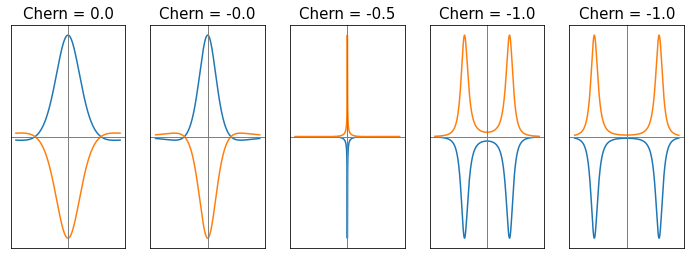

In [12]:
plt.figure(figsize=(10,4))
spt = 150
for m in ms:
    spt += 1
    plt.subplot(spt)
    
    plt.title('Chern = ' + str(np.round(chern[m], 5)), fontsize=15)
    
    plt.plot(ks, berry[m][:,0])
    plt.plot(ks, berry[m][:,1])
    
    plt.axhline(0, lw=1, c='grey')
    plt.axvline(0, lw=1, c='grey')
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()